### 1. 라이브러리 불러오기

In [39]:
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 표를 다룰때 사용
import matplotlib.pyplot as plt # 그래프(시각화) 라이브러리
import seaborn as sns # 시각화 라이브러리

# 경고창 제거
import warnings
warnings.filterwarnings('ignore')

# 모델 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 분류용 모델 평가도구 (정확도)
from sklearn.model_selection import cross_val_score

# sklearn 내부에 평가지표 모음집을 확인해보자
# sklearn.metrics : 분류 /회귀 평가지표 모음집
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import f1_score # f1_score
from sklearn.metrics import roc_curve # Roc 곡선
from sklearn.metrics import auc # area_under_curve

# grid_search 모델 불러오기
from sklearn.model_selection import GridSearchCV

# 데이터 분리도구 
from sklearn.model_selection import train_test_split

# 진행률 확인
from tqdm import tqdm
import numpy as np

### 2. 데이터 수집

In [40]:
# 데이터 불러오기
train_data = pd.read_csv('kaggle/train.csv', index_col='no')
test_data = pd.read_csv('kaggle/test.csv',  index_col='no')

In [41]:
train_data

age          workclass  fnlwgt      education  education-num  \
no                                                                    
1       25            Private  219199           11th              7   
2       39            Private   52978   Some-college             10   
3       35            Private  196899      Bachelors             13   
4       64            Private  135527      Assoc-voc             11   
5       24            Private   60783   Some-college             10   
...    ...                ...     ...            ...            ...   
29301   20            Private  100605        HS-grad              9   
29302   21            Private  372636        HS-grad              9   
29303   18   Self-emp-not-inc  258474           10th              6   
29304   33            Private  157446           11th              7   
29305   65                  ?   94809        HS-grad              9   

            marital-status          occupation    relationship  \
no                                                               
1                 Divorced   Machine-op-inspct   Not-in-family   
2                 Divorced       Other-service   Not-in-family   
3            Never-married   Handlers-cleaners   Not-in-family   
4                 Divorced        Tech-support   Not-in-family   
5       Married-civ-spouse    Transport-moving         Husband   
...                    ...                 ...             ...   
29301        Never-married               Sales       Own-child   
29302        Never-married               Sales       Own-child   
29303        Never-married     Farming-fishing       Own-child   
29304        Never-married        Craft-repair   Not-in-family   
29305              Widowed                   ?   Not-in-family   

                      race      sex  capital-gain  capital-loss  \
no                                                                
1                    White     Male             0             0   
2                    White   Female             0          1721   
3       Asian-Pac-Islander   Female             0             0   
4                    White   Female             0             0   
5                    White     Male             0             0   
...                    ...      ...           ...           ...   
29301                Other     Male             0             0   
29302                Black     Male             0             0   
29303                White     Male             0             0   
29304                White     Male             0             0   
29305                White   Female             0             0   

       hours-per-week  native-country  income  
no                                             
1                  40   United-States       0  
2                  55   United-States       0  
3                  50           Haiti       0  
4                  40   United-States       0  
5                  70   United-States       1  
...               ...             ...     ...  
29301              40     Puerto-Rico       0  
29302              40   United-States       0  
29303              40   United-States       0  
29304              65   United-States       0  
29305              40   United-States       0  

[29305 rows x 15 columns]

In [42]:
test_data

age          workclass  fnlwgt      education  education-num  \
no                                                                    
29306   18                  ?  245274   Some-college             10   
29307   29            Private   83003        HS-grad              9   
29308   45            Private   35136      Bachelors             13   
29309   42   Self-emp-not-inc   64631      Bachelors             13   
29310   41            Private  195821      Doctorate             16   
...    ...                ...     ...            ...            ...   
48838   45   Self-emp-not-inc  116789        HS-grad              9   
48839   48            Private  185079        HS-grad              9   
48840   63            Private  117473   Some-college             10   
48841   18            Private  150817           11th              7   
48842   31            Private  341632     Assoc-acdm             12   

            marital-status        occupation    relationship    race      sex  \
no                                                                              
29306        Never-married                 ?       Own-child   White     Male   
29307   Married-civ-spouse     Other-service            Wife   White   Female   
29308   Married-civ-spouse      Tech-support         Husband   Black     Male   
29309   Married-civ-spouse   Exec-managerial         Husband   White     Male   
29310   Married-civ-spouse   Exec-managerial            Wife   White   Female   
...                    ...               ...             ...     ...      ...   
48838   Married-civ-spouse      Craft-repair         Husband   White     Male   
48839        Never-married   Exec-managerial   Not-in-family   White   Female   
48840   Married-civ-spouse    Prof-specialty         Husband   White     Male   
48841        Never-married             Sales       Own-child   White   Female   
48842   Married-civ-spouse      Tech-support         Husband   Black     Male   

       capital-gain  capital-loss  hours-per-week  native-country  
no                                                                 
29306             0             0              16   United-States  
29307             0             0              40   United-States  
29308             0             0              40   United-States  
29309             0             0              40   United-States  
29310             0          1902              40   United-States  
...             ...           ...             ...             ...  
48838             0             0              60   United-States  
48839             0             0              50   United-States  
48840          4386             0              40   United-States  
48841             0             0              20   United-States  
48842             0             0              46   United-States  

[19537 rows x 14 columns]

In [43]:
# train_data.shape과 test_data.shape의 정보
print(train_data.shape, test_data.shape)

(29305, 15) (19537, 14)


### 3. 탐색적 데이터 분석

In [44]:
# train_data의 기술통계량 확인
train_data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  29305.000000  2.930500e+04   29305.000000  29305.000000  29305.000000   
mean      38.659171  1.897357e+05      10.083057   1084.531786     87.073571   
std       13.743827  1.056348e+05       2.570371   7495.715677    401.225580   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176060e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.779550e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377130e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week        income  
count    29305.000000  29305.000000  
mean        40.440096      0.240403  
std         12.332840      0.427335  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

In [45]:
# teset_data의 기술통계량 확인
test_data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  19537.000000  1.953700e+04   19537.000000  19537.000000  19537.000000   
mean      38.620208  1.895568e+05      10.070635   1070.871526     88.145416   
std       13.660701  1.055605e+05       2.571923   7386.174276    405.667779   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.174770e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783190e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.375460e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   3900.000000   

       hours-per-week  
count    19537.000000  
mean        40.395813  
std         12.479102  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [46]:
# train_data와 test_data의 info 정보
print("[train_data의 info 정보]")
print("============================================")
print(train_data.info())
print()
print("[test_data의 info 정보]")
print("============================================")
print(test_data.info())

[train_data의 info 정보]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB
None

[test_data의 info 정보]
<class 'pandas.core.frame.DataFrame'>
Int64I

In [47]:
# train_dat 값에 있는 모든 공백 제거
for col in train_data.columns:
    # 열이 문자열인지 확인
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].str.strip() # 문자열이면 양쪽 공백 제거


# train_data의 데이터 확인 및 고유값 파악
print("train_data 정보\n")
for col in train_data.columns:
    print(f'컬럼 : {col}')
    print(train_data[f'{col}'].unique(),"\n")
    print(train_data[f'{col}'].value_counts(),"\n")

train_data 정보

컬럼 : age
[25 39 35 64 24 66 56 70 21 33 45 54 63 58 44 31 17 43 18 23 50 19 38 29
 30 47 28 22 59 34 49 36 32 46 42 61 40 26 57 27 41 37 60 48 62 53 68 75
 20 51 73 69 72 65 76 52 55 74 90 67 78 80 77 71 81 83 82 79 85 87 84 88
 86 89] 

35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
87      1
86      1
89      1
Name: age, Length: 74, dtype: int64 

컬럼 : workclass
['Private' 'Self-emp-not-inc' 'Local-gov' '?' 'State-gov' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' 'Never-worked'] 

Private             20410
Self-emp-not-inc     2305
Local-gov            1868
?                    1663
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64 

컬럼 : fnlwgt
[219199  52978 196899 ... 100605 372636 258474] 

203488    14
126569    13
190290    12
97723     11
132879    11
          ..
129972     1
402998     1
123384     1
129806     1
258474

In [48]:
# test_data 값에 있는 모든 공백 제거
for col in test_data.columns:
    # 열이 문자열인지 확인
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].str.strip() # 문자열이면 양쪽 공백 제거

# test_data의 데이터 확인 및 고유값 파악
print("test_data 정보\n")
for col in test_data.columns:
    print(f'컬럼 : {col}')
    print(test_data[f'{col}'].unique(),"\n")
    print(test_data[f'{col}'].value_counts(),"\n")

test_data 정보

컬럼 : age
[18 29 45 42 41 17 34 22 35 36 40 81 21 26 24 33 27 55 49 52 60 51 48 25
 19 31 44 61 72 23 39 71 47 43 58 38 62 80 28 68 30 59 20 32 53 66 63 79
 54 65 37 46 50 64 78 57 56 67 90 73 69 75 70 76 77 74 88 82 84 87 89 83
 85] 

36    561
28    557
31    532
30    523
38    520
     ... 
83      5
85      3
88      2
87      2
89      1
Name: age, Length: 73, dtype: int64 

컬럼 : workclass
['?' 'Private' 'Self-emp-not-inc' 'Local-gov' 'Self-emp-inc' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked'] 

Private             13496
Self-emp-not-inc     1557
Local-gov            1268
?                    1136
State-gov             780
Self-emp-inc          708
Federal-gov           578
Without-pay             9
Never-worked            5
Name: workclass, dtype: int64 

컬럼 : fnlwgt
[245274  83003  35136 ... 117473 150817 341632] 

125892    11
188246     9
120277     9
99185      8
113364     8
          ..
103743     1
181723     1
162741     1
199590     1
341632    

In [49]:
# "?" 데이터 확인하기 train의 workclass : 1663, occupation : 1668
work_occ = train_data[(train_data['workclass'] == '?') & (train_data['occupation']=='?')].shape[0]
work = train_data[train_data['workclass']=='?'].shape[0]
print("work_occd의 수 :", work_occ, "work의 수 :", work)

work_occd의 수 : 1663 work의 수 : 1663


In [50]:
# workclass의 " ?"를 "Never-worked"으로 채우기
train_data["workclass"] = train_data["workclass"].replace("?","Never-worked")
test_data["workclass"] = test_data["workclass"].replace("?","Never-worked")

In [51]:
# train과 test의 workclass의 "?"값이 "Never-worked"으로 바뀌었는지 확인
print(train_data["workclass"].unique())
print(train_data["workclass"].value_counts())

['Private' 'Self-emp-not-inc' 'Local-gov' 'Never-worked' 'State-gov'
 'Self-emp-inc' 'Federal-gov' 'Without-pay']
Private             20410
Self-emp-not-inc     2305
Local-gov            1868
Never-worked         1668
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Name: workclass, dtype: int64


In [52]:
# occupation의 " ?"를 "Not-occ"으로 채우기
train_data["occupation"] = train_data["occupation"].replace("?","Not-occ")
test_data["occupation"] = test_data["occupation"].replace("?","Not-occ")

In [53]:
# train과 test의 occupation의 "?"값이 "Not-occ"으로 바뀌었는지 확인
print(train_data["occupation"].unique())
print(train_data["occupation"].value_counts())

['Machine-op-inspct' 'Other-service' 'Handlers-cleaners' 'Tech-support'
 'Transport-moving' 'Farming-fishing' 'Prof-specialty' 'Priv-house-serv'
 'Adm-clerical' 'Protective-serv' 'Exec-managerial' 'Not-occ'
 'Craft-repair' 'Sales' 'Armed-Forces']
Prof-specialty       3724
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
Not-occ              1668
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64


In [54]:
# native-country의 " ?"를 "United-States"으로 채우기
train_data["native-country"] = train_data["native-country"].replace("?","United-States")
test_data["native-country"] = test_data["native-country"].replace("?","United-States")

In [55]:
# train과 test의 native-country의 "?"값이 "United-States"으로 바뀌었는지 확인
print(train_data["native-country"].unique())
print(train_data["native-country"].value_counts())

['United-States' 'Haiti' 'Mexico' 'Puerto-Rico' 'Philippines' 'Germany'
 'Peru' 'Ecuador' 'Iran' 'Thailand' 'Dominican-Republic' 'Poland'
 'Scotland' 'Italy' 'Jamaica' 'China' 'Portugal' 'Columbia' 'Hungary'
 'Vietnam' 'Taiwan' 'Canada' 'Hong' 'Guatemala' 'El-Salvador' 'England'
 'Outlying-US(Guam-USVI-etc)' 'India' 'France' 'Cuba' 'Greece'
 'Trinadad&Tobago' 'South' 'Japan' 'Yugoslavia' 'Nicaragua' 'Ireland'
 'Cambodia' 'Laos' 'Honduras' 'Holand-Netherlands']
United-States                 26796
Mexico                          579
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy                          

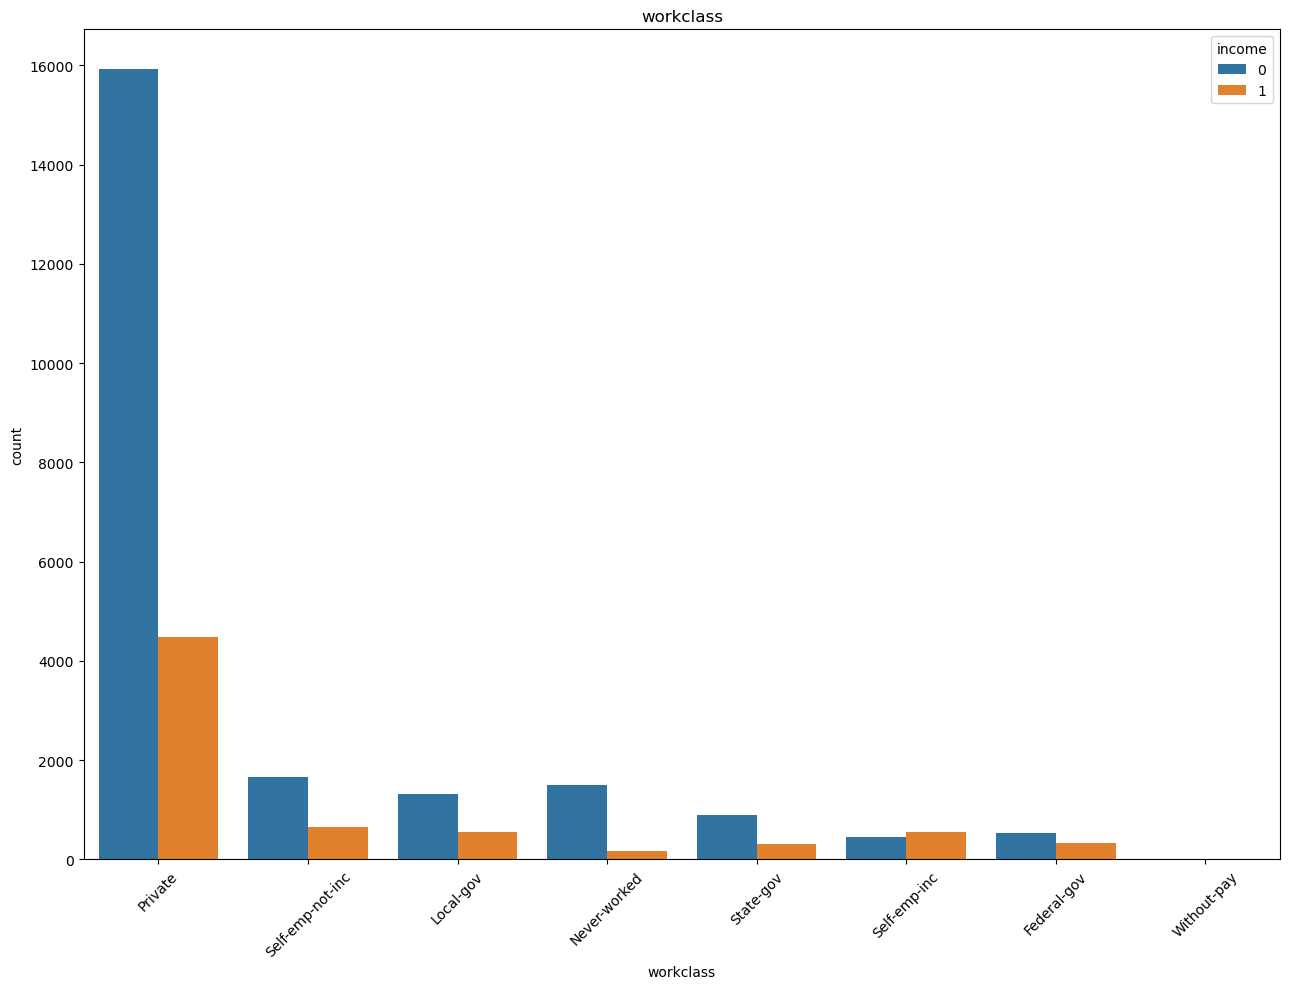

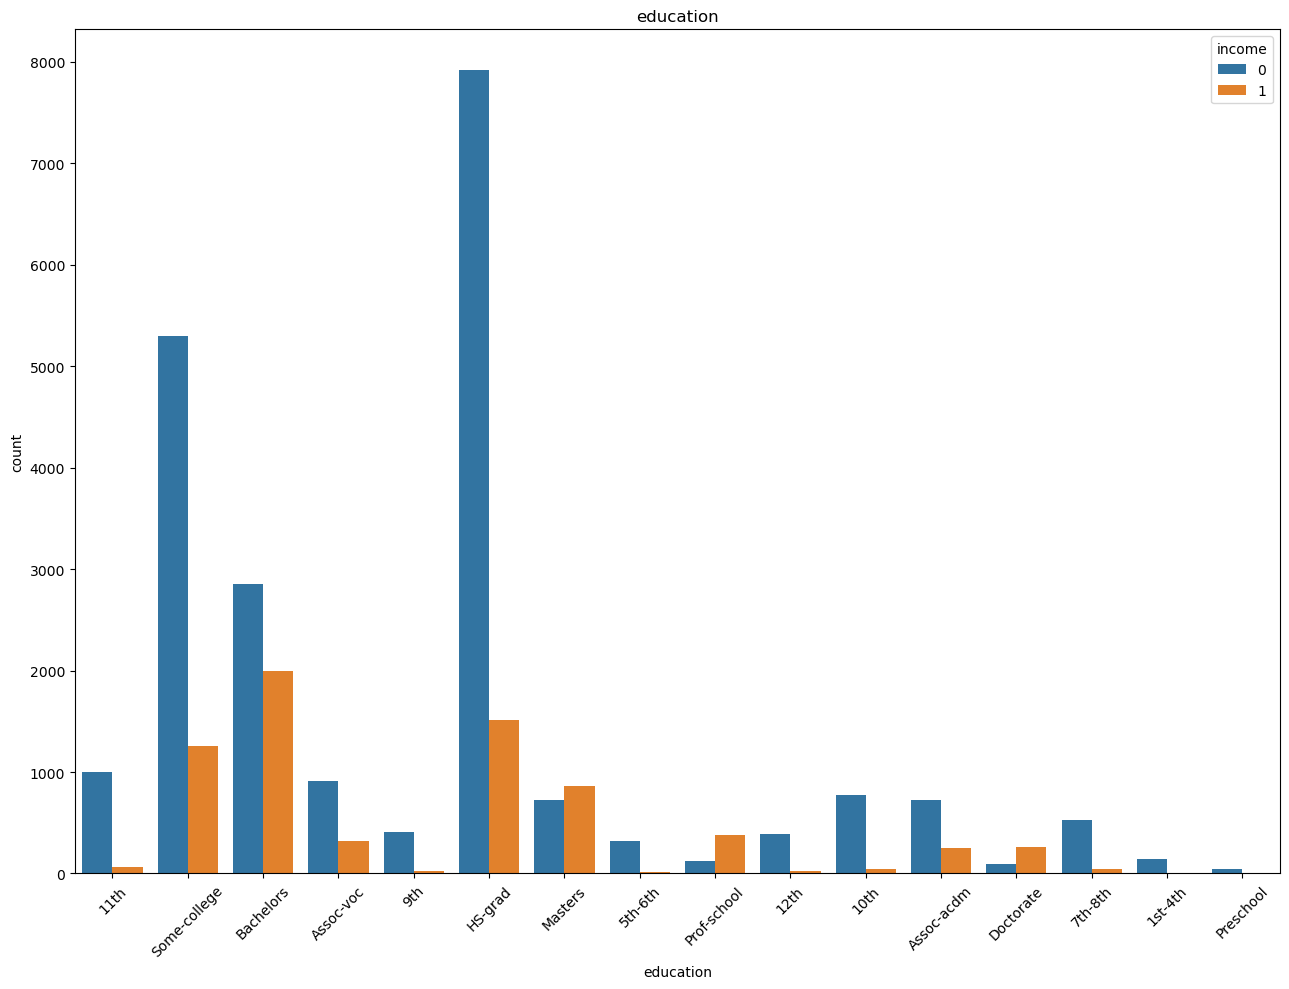

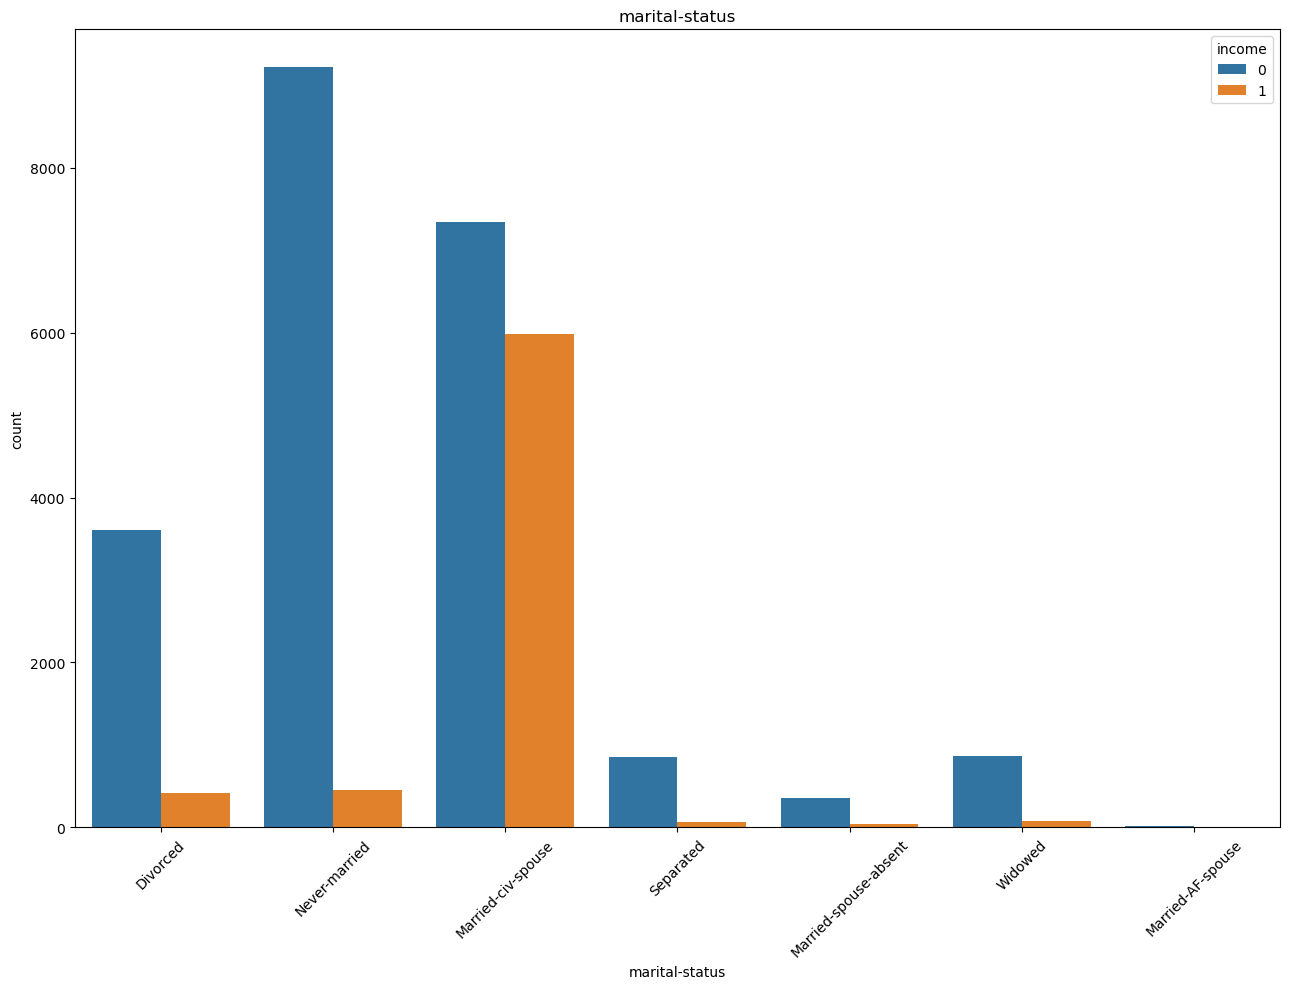

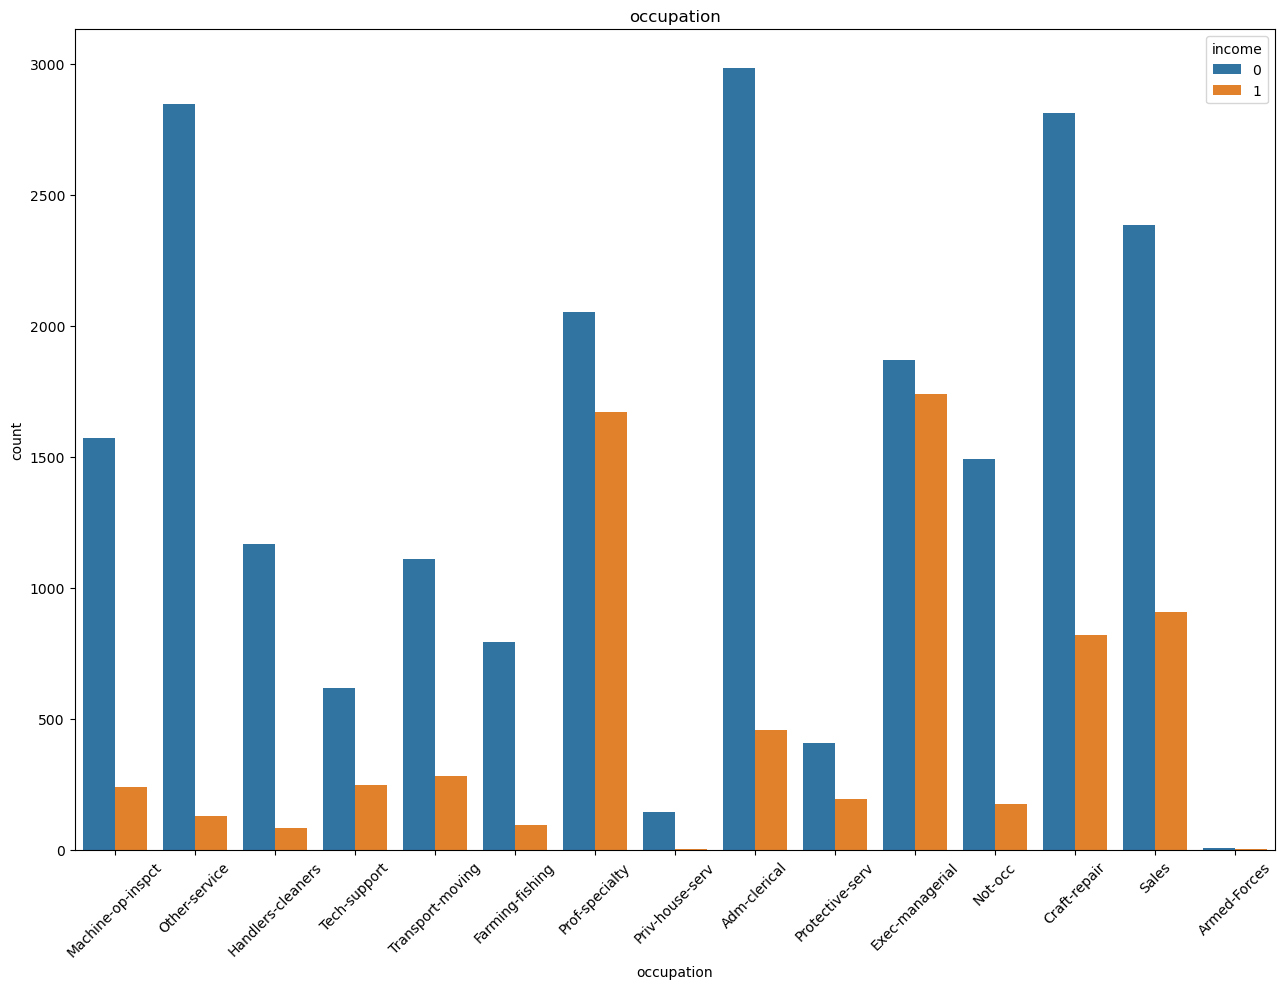

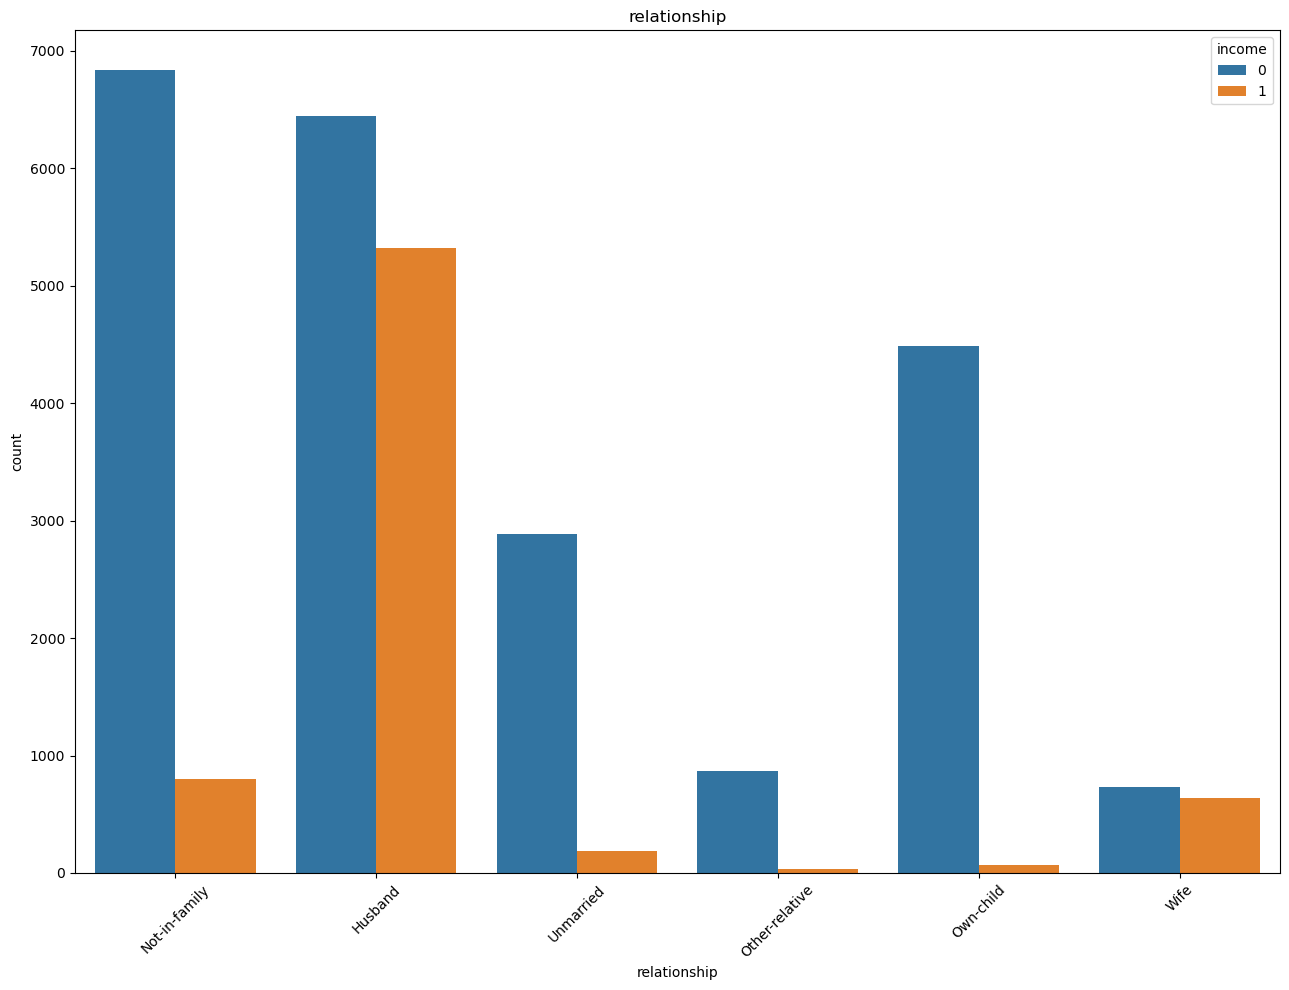

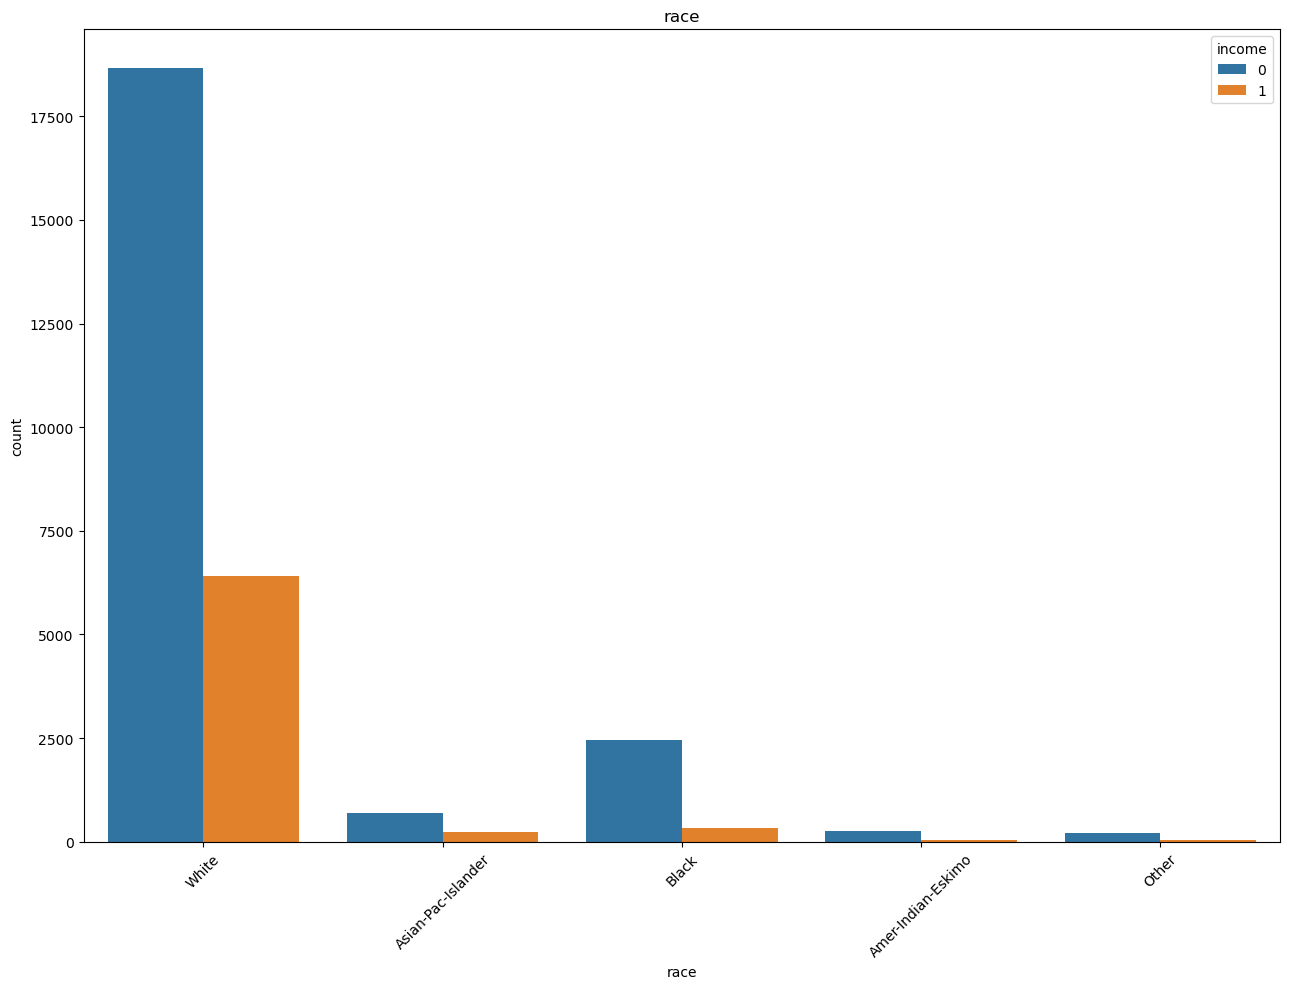

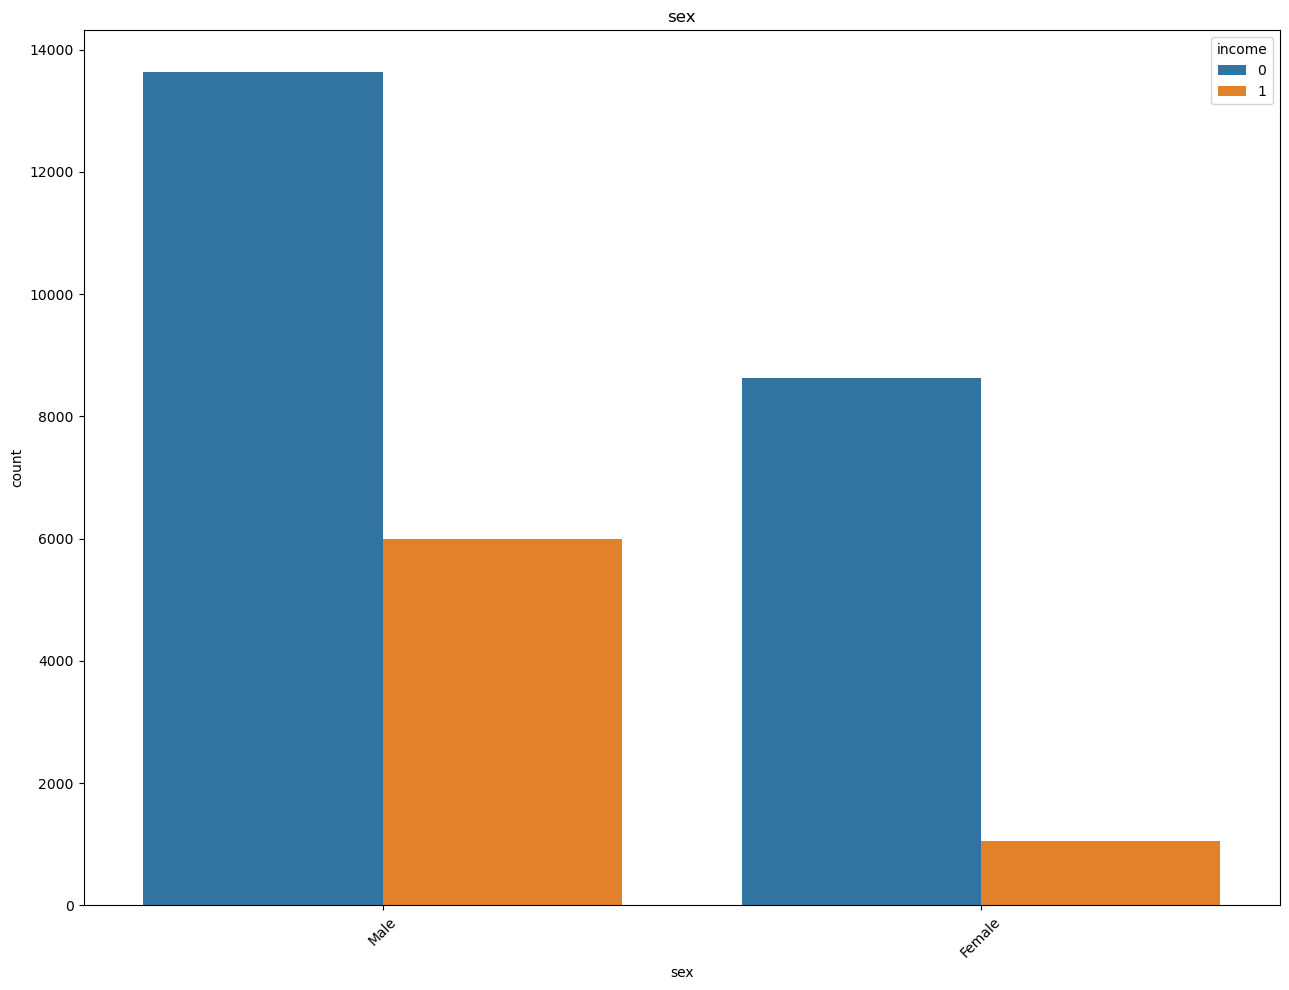

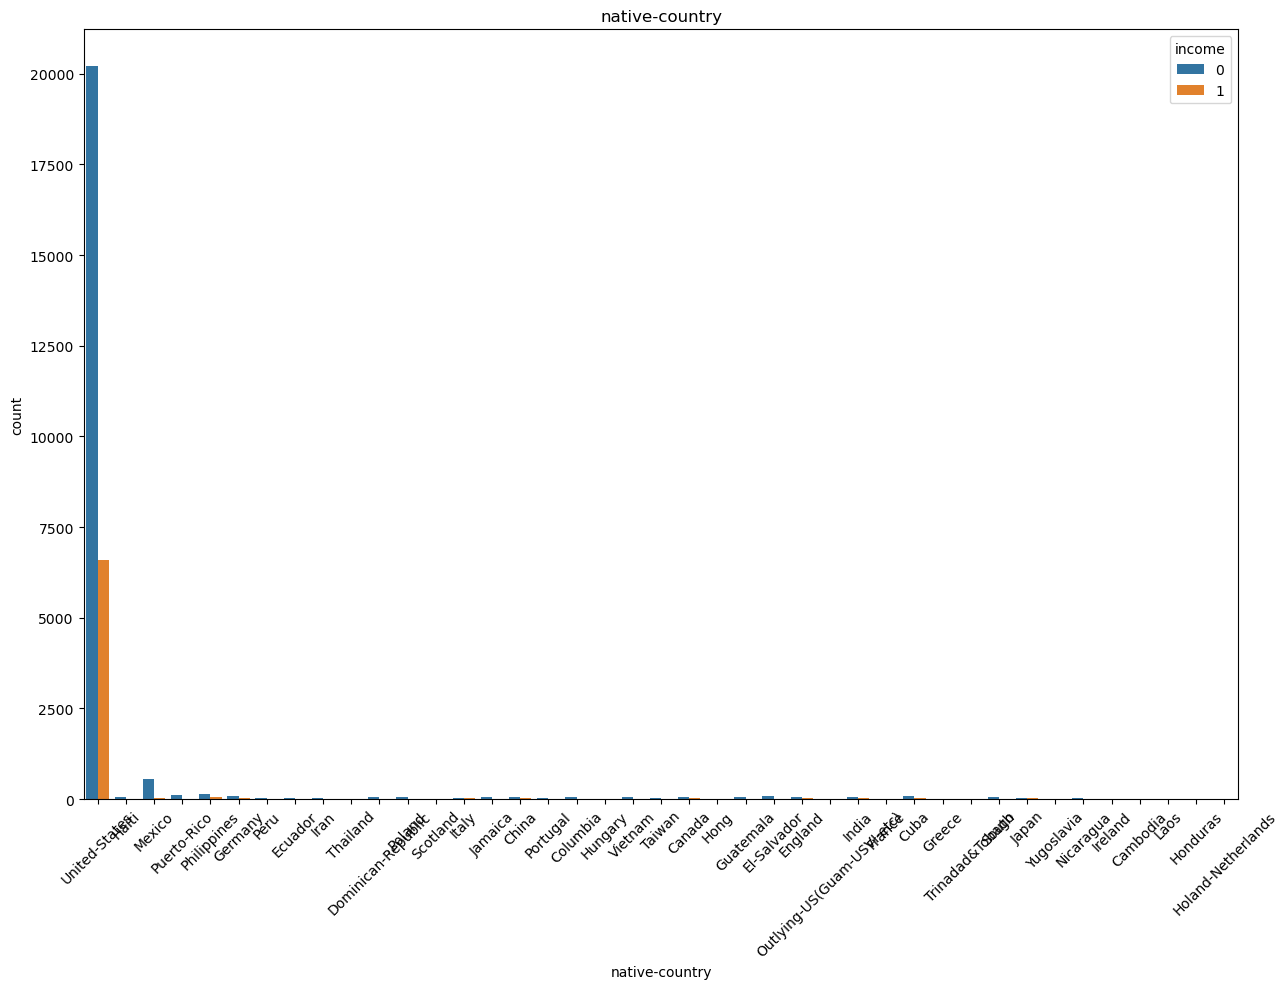

In [56]:
# [object값] workclass, education, marital-status, occupation, relationship, race, sex, native-country
# object 변수 리스트
categorical_variables = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# 반복문을 통해 각 범주형 변수에 대한 countplot 생성
for var in categorical_variables:
    plt.figure(figsize = (13, 10))
    sns.countplot(data = train_data, x = var, hue = 'income')
    plt.title(f'{var}')
    plt.xticks(rotation = 45)
    plt.xlabel(var)
    plt.legend(title = 'income', loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [57]:
# 'workclass' 그룹화
train_data['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'Never-worked',
       'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay'],
      dtype=object)

In [58]:
workclass = ['Private', 'Self-emp-not-inc', 'Self-emp-inc' ,'Local-gov', 'State-gov',
     'Federal-gov', 'Without-pay', 'Never-worked']
convert_workclass = ['Private', 'Self', 'Self', 'Gov', 'Gov', 'Gov', 'Nopay', 'Nopay']
work_dic = dict(zip(workclass,convert_workclass))
work_dic

{'Private': 'Private',
 'Self-emp-not-inc': 'Self',
 'Self-emp-inc': 'Self',
 'Local-gov': 'Gov',
 'State-gov': 'Gov',
 'Federal-gov': 'Gov',
 'Without-pay': 'Nopay',
 'Never-worked': 'Nopay'}

In [59]:
# map() 함수를 사용하여 key값에 해당하는 데이터를 value값으로 변환 
train_data['workclass'] = train_data['workclass'].map(work_dic)
test_data['workclass'] = test_data['workclass'].map(work_dic)
print(len(train_data['workclass'].unique()), train_data['workclass'].unique(), len(test_data['workclass'].unique()), test_data['workclass'].unique())

4 ['Private' 'Self' 'Gov' 'Nopay'] 4 ['Nopay' 'Private' 'Self' 'Gov']


In [60]:
# education과 education-num은 같으므로 education은 drop
train_data.drop(['education'], axis = 1, inplace = True)
test_data.drop(['education'], axis = 1, inplace = True)

In [61]:
# 'marital-status' 그룹화
train_data['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [62]:
marital_status = ['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated', 'Married-spouse-absent', 'Widowed', 'Married-AF-spouse']
convert_marital = ['Alone', 'Alone', 'NotAlone', 'Alone', 'Alone', 'Alone', 'NotAlone']
marital_dic = dict(zip(marital_status,convert_marital))
marital_dic

{'Divorced': 'Alone',
 'Never-married': 'Alone',
 'Married-civ-spouse': 'NotAlone',
 'Separated': 'Alone',
 'Married-spouse-absent': 'Alone',
 'Widowed': 'Alone',
 'Married-AF-spouse': 'NotAlone'}

In [63]:
train_data['marital-status'] = train_data['marital-status'].map(marital_dic)
test_data['marital-status'] = test_data['marital-status'].map(marital_dic)
print(len(train_data['marital-status'].unique()), train_data['marital-status'].unique(), len(test_data['marital-status'].unique()), test_data['marital-status'].unique())

2 ['Alone' 'NotAlone'] 2 ['Alone' 'NotAlone']


In [64]:
# 'relationship' 그룹화
train_data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Unmarried', 'Other-relative',
       'Own-child', 'Wife'], dtype=object)

In [65]:
rel = ['Not-in-family', 'Husband', 'Unmarried', 'Other-relative', 'Own-child', 'Wife']
convert_rel = ['Not-in-family', 'Married', 'Unmarried', 'Other-relative', 'Own-child', 'Married']
rel_dic = dict(zip(rel,convert_rel))
rel_dic

{'Not-in-family': 'Not-in-family',
 'Husband': 'Married',
 'Unmarried': 'Unmarried',
 'Other-relative': 'Other-relative',
 'Own-child': 'Own-child',
 'Wife': 'Married'}

In [66]:
train_data['relationship'] = train_data['relationship'].map(rel_dic)
test_data['relationship'] = test_data['relationship'].map(rel_dic)
print(len(train_data['relationship'].unique()), train_data['relationship'].unique(), len(test_data['relationship'].unique()), test_data['relationship'].unique())

5 ['Not-in-family' 'Married' 'Unmarried' 'Other-relative' 'Own-child'] 5 ['Own-child' 'Married' 'Not-in-family' 'Unmarried' 'Other-relative']


In [67]:
# 'native-country' 그룹화
train_data['native-country'].unique()
train_data['native-country'].unique()

array(['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands'],
      dtype=object)

In [68]:
cty = ['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands']

convert_cty = ['NA', 'NA', 'NA', 'NA', 'AS', 'EU', 'SA', 'SA',
               'AS', 'AS', 'NA', 'EU', 'EU', 'EU', 'NA', 'AS',
               'EU', 'SA', 'EU', 'AS', 'AS', 'NA', 'AS', 'NA',
               'NA', 'EU', 'NA', 'AS', 'EU', 'NA', 'EU', 'NA',
               'AS', 'AS', 'EU', 'NA', 'EU', 'AS', 'AS', 'NA', 'EU']
cty_dic = dict(zip(cty, convert_cty))
cty_dic

{'United-States': 'NA',
 'Haiti': 'NA',
 'Mexico': 'NA',
 'Puerto-Rico': 'NA',
 'Philippines': 'AS',
 'Germany': 'EU',
 'Peru': 'SA',
 'Ecuador': 'SA',
 'Iran': 'AS',
 'Thailand': 'AS',
 'Dominican-Republic': 'NA',
 'Poland': 'EU',
 'Scotland': 'EU',
 'Italy': 'EU',
 'Jamaica': 'NA',
 'China': 'AS',
 'Portugal': 'EU',
 'Columbia': 'SA',
 'Hungary': 'EU',
 'Vietnam': 'AS',
 'Taiwan': 'AS',
 'Canada': 'NA',
 'Hong': 'AS',
 'Guatemala': 'NA',
 'El-Salvador': 'NA',
 'England': 'EU',
 'Outlying-US(Guam-USVI-etc)': 'NA',
 'India': 'AS',
 'France': 'EU',
 'Cuba': 'NA',
 'Greece': 'EU',
 'Trinadad&Tobago': 'NA',
 'South': 'AS',
 'Japan': 'AS',
 'Yugoslavia': 'EU',
 'Nicaragua': 'NA',
 'Ireland': 'EU',
 'Cambodia': 'AS',
 'Laos': 'AS',
 'Honduras': 'NA',
 'Holand-Netherlands': 'EU'}

In [69]:
train_data['native-country'] = train_data['native-country'].map(cty_dic)
test_data['native-country'] = test_data['native-country'].map(cty_dic)
print(len(train_data['native-country'].unique()), train_data['native-country'].unique(), len(test_data['native-country'].unique()), test_data['native-country'].unique())

4 ['NA' 'AS' 'EU' 'SA'] 4 ['NA' 'EU' 'AS' 'SA']


### capital-gain, capita-loss의 편차가 크기때문에
- 로그변환을 진행
- 로그변환을 하는 이유?
- 데이터의 스케일 차이가 클 경우에 사용
- 데이터의 편차를 줄이고, 비대칭적인 분포를 보다 정규분포에 가깝게 만들어 주는 효과가 있기 때문에
- 로그 변환은 왜도와 첨도를 가진 변수를 정규분포에 비슷하게 만들어주는 효과가 있음
- 특히 편차가 큰 데이터에 대해서는 로그 변환을 적용하면 이상치의 영향을 줄이고 모델의 성능을 향상시킬 수 있음

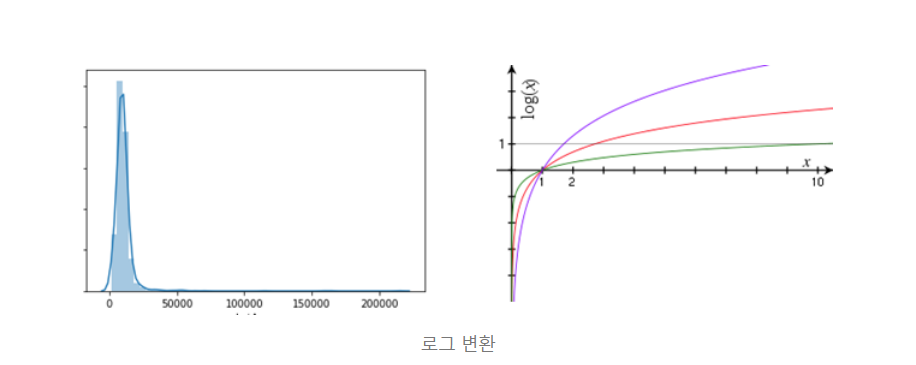

### np.log()대신 np.log1p()를 사용하는 이유
- x가 0에 가까운 경우 y가 -무한대(-infinite)의 값을 가짐
- 1을 더함으로써 0보다 큰 양수의 값을 가지게 되는데
- 매번 하기 힘들기 때문에 log1p()를 사용

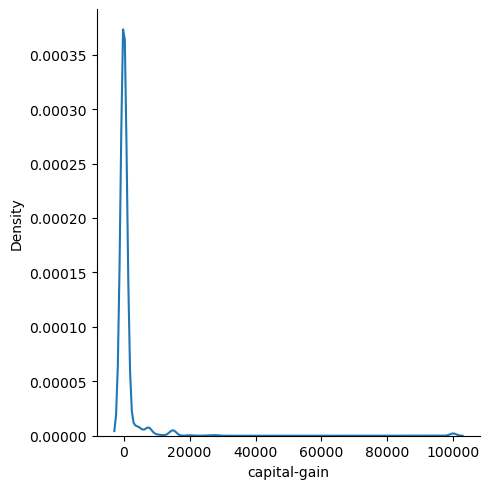

In [70]:
sns.displot(data=train_data, x="capital-gain", kind="kde")

In [71]:
# np.log1p() 적용
train_data['capital-gain'] = np.log1p(train_data['capital-gain'])
train_data['capital-loss'] = np.log1p(train_data['capital-loss'])
test_data['capital-gain'] = np.log1p(test_data['capital-gain'])
test_data['capital-loss'] = np.log1p(test_data['capital-loss'])

In [72]:
# np.log1p() 적용 확인
print("train_data['capital_gain']\n", train_data['capital-gain'].unique(), "\n\ntrain_data['capital_loss']\n", train_data['capital-loss'].unique(),"\n")
print("test_data['capital_gain']\n",test_data['capital-gain'].unique(), "\n\ntest_data['capital_loss']\n", test_data['capital-loss'].unique())

train_data['capital_gain']
 [ 0.         11.51292546  7.04925484  7.68570306  9.55286568  8.10952566
  8.04044688  7.68478394  9.06126015 10.23383392  9.57115673  9.61747076
  7.80954132  8.05134093  6.38856141  8.55236727  8.27969713  7.76429601
  8.94754602  9.90608418  7.73674368  8.20930841  8.83200393  8.13710339
  8.50410795  7.69757535  8.6044712   9.51421562  8.51998928  8.31922994
  7.97522084  8.89549263  8.91341572  8.44483753  7.96762674  7.94803199
  8.3864009   7.99900721  5.99645209  8.31016902  7.26192709  7.8770179
  8.47386807  7.65254569  7.99463231  9.14708103  8.77924972  9.26112854
  6.96224346  9.26549122  8.15046791  9.6172045   8.39321601  7.25134498
  8.8199609   6.99117689  8.24774389  7.62608276  8.15248608  8.97423822
  8.23800825  8.27103687  8.71571613  8.41383068  8.13505391  7.3178762
  9.66978849  7.068172    8.09376776  8.76701762  7.75362355 10.43693535
  8.26565017  7.98514393  8.91516362  6.81892407  7.2943773   6.89972311
  7.49443022  7.61923342 

train_data['capital-gain']
 0.000000     26883
9.617471       300
8.947546       240
8.895493       204
11.512925      148
             ...  
8.984568         1
7.142827         1
8.715716         1
8.796793         1
9.824553         1
Name: capital-gain, Length: 117, dtype: int64


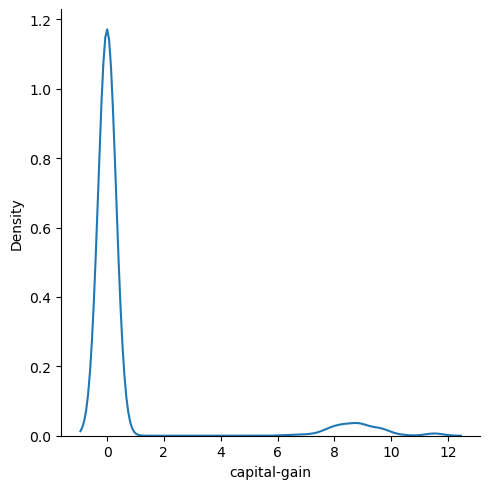

In [73]:
sns.displot(data=train_data, x="capital-gain", kind="kde")
print("train_data['capital-gain']\n",train_data['capital-gain'].value_counts())

In [74]:
# train_data의 데이터 확인 및 고유값 파악
print("train_data 정보\n")
for col in train_data.columns:
    print(f'컬럼 : {col}')
    print(train_data[f'{col}'].unique(),"\n")
    print(train_data[f'{col}'].value_counts(),"\n")

train_data 정보

컬럼 : age
[25 39 35 64 24 66 56 70 21 33 45 54 63 58 44 31 17 43 18 23 50 19 38 29
 30 47 28 22 59 34 49 36 32 46 42 61 40 26 57 27 41 37 60 48 62 53 68 75
 20 51 73 69 72 65 76 52 55 74 90 67 78 80 77 71 81 83 82 79 85 87 84 88
 86 89] 

35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
87      1
86      1
89      1
Name: age, Length: 74, dtype: int64 

컬럼 : workclass
['Private' 'Self' 'Gov' 'Nopay'] 

Private    20410
Gov         3923
Self        3292
Nopay       1680
Name: workclass, dtype: int64 

컬럼 : fnlwgt
[219199  52978 196899 ... 100605 372636 258474] 

203488    14
126569    13
190290    12
97723     11
132879    11
          ..
129972     1
402998     1
123384     1
129806     1
258474     1
Name: fnlwgt, Length: 19973, dtype: int64 

컬럼 : education-num
[ 7 10 13 11  5  9 14  3 15  8  6 12 16  4  2  1] 

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      4

In [75]:
# test_data의 데이터 확인 및 고유값 파악
print("test_data 정보\n")
for col in test_data.columns:
    print(f'컬럼 : {col}')
    print(test_data[f'{col}'].unique(),"\n")
    print(test_data[f'{col}'].value_counts(),"\n")

test_data 정보

컬럼 : age
[18 29 45 42 41 17 34 22 35 36 40 81 21 26 24 33 27 55 49 52 60 51 48 25
 19 31 44 61 72 23 39 71 47 43 58 38 62 80 28 68 30 59 20 32 53 66 63 79
 54 65 37 46 50 64 78 57 56 67 90 73 69 75 70 76 77 74 88 82 84 87 89 83
 85] 

36    561
28    557
31    532
30    523
38    520
     ... 
83      5
85      3
88      2
87      2
89      1
Name: age, Length: 73, dtype: int64 

컬럼 : workclass
['Nopay' 'Private' 'Self' 'Gov'] 

Private    13496
Gov         2626
Self        2265
Nopay       1150
Name: workclass, dtype: int64 

컬럼 : fnlwgt
[245274  83003  35136 ... 117473 150817 341632] 

125892    11
188246     9
120277     9
99185      8
113364     8
          ..
103743     1
181723     1
162741     1
199590     1
341632     1
Name: fnlwgt, Length: 14894, dtype: int64 

컬럼 : education-num
[10  9 13 16  6 11 14  4  5  7 15 12  3  8  2  1] 

9     6349
10    4320
13    3177
14    1070
11     831
7      755
12     621
6      573
4      381
15     334
5      326
16     247
8

In [38]:
X_train = train_data.drop('income', axis = 1) # train할 데이터
y_train = train_data['income'] # income 결과
X_test = test_data # test할 데이터
print(X_train.shape, X_test.shape, y_train.shape)

(29305, 13) (19537, 13) (29305,)


In [39]:
X_train = pd.get_dummies(X_train, dtype='int64') # train할 데이터 on-hot 인코딩
X_test = pd.get_dummies(X_test, dtype='int64') # test할 데이터 on-hot 인코딩
print(X_train.shape, X_test.shape, y_train.shape)

(29305, 43) (19537, 43) (29305,)


In [92]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

## KNN

In [49]:
# 후보 n_neighbors 값 범위 설정
neighbors_list = list(range(1, 51))  # 1부터 50까지의 이웃 수 후보

# 성능을 저장할 리스트 초기화
mean_scores = []

# 각각의 n_neighbors 값에 대해 교차 검증 수행
for n in tqdm(neighbors_list):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    # 교차 검증 수행하여 정확도 평균을 계산
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())

# 가장 높은 평균 성능을 가진 인덱스 찾기
best_index = mean_scores.index(max(mean_scores))
best_n_neighbors = neighbors_list[best_index]

print("가장 높은 평균 성능을 보이는 n_neighbors:", best_n_neighbors)

100%|██████████| 50/50 [10:11<00:00, 12.22s/it]

가장 높은 평균 성능을 보이는 n_neighbors: 45


#### knn_model의 가장 높은 평균 성능을 보이는 n_neighbors : 45

In [54]:
# knn_model 생성
knn_model = KNeighborsClassifier(n_neighbors=45)
# 모델 학습
knn_model.fit(X_train, y_train)
# 모델 예측
knn_pre = knn_model.predict(X_test.values)

array([0.7593831 , 0.76016926, 0.75948676, 0.75921376])

In [58]:
# 답안지 작성
knn_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
knn_result['income'] = knn_pre
# 파일 저장
knn_result.to_csv('kaggle/knn_result.csv', index=True)

## Decision Tree

In [69]:
# 최적의 max_depth를 찾기 위한 반복문
best_max_depth = None
best_mean_score = 0

for max_depth in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 20까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=max_depth)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 max_depth가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_depth = max_depth
        best_mean_score = mean_score

print("최적의 max_depth:", best_max_depth)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 50/50 [00:24<00:00,  2.08it/s]

최적의 max_depth: 8
교차 검증 평균 정확도: 0.8525848831257464


#### 최적의 max_depth: 8
#### 교차 검증 평균 정확도: 0.8528237502132742

In [84]:
# 최적의 max_depth에 대해 최적의 min_samples_split을 찾기 위한 반복문
best_min_samples_split = None
best_mean_score = 0

for min_samples_split in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 20까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=min_samples_split)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 min_samples_split이 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_split = min_samples_split
        best_mean_score = mean_score

print("최적의 min_samples_split:", best_min_samples_split)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 50/50 [00:21<00:00,  2.28it/s]

최적의 min_samples_split: 10
교차 검증 평균 정확도: 0.8528237502132742


#### 최적의 min_samples_split: 9
#### 교차 검증 평균 정확도: 0.8528919979525679

In [86]:
# 최적의 max_depth와 min_samples_split에 대해 최적의 min_samples_leaf을 찾기 위한 반복문
best_min_samples_leaf = None
best_mean_score = 0

for min_samples_leaf in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 20까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=min_samples_leaf)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 min_samples_leaf이 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_leaf = min_samples_leaf
        best_mean_score = mean_score

print("최적의 min_samples_split:", best_min_samples_leaf)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 50/50 [00:23<00:00,  2.13it/s]

최적의 min_samples_split: 4
교차 검증 평균 정확도: 0.8531991127793891


#### 최적의 min_samples_split: 5
#### 교차 검증 평균 정확도: 0.8531991127793891

In [88]:
# 최적의 max_depth, min_samples_split, min_samples_leaf에 대해 최적의 max_features를 찾기 위한 반복문
best_max_features = None
best_mean_score = 0

for max_features in tqdm(range(1, len(X_train.columns) + 1)):  # max_features를 1부터 특성 개수까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=9, min_samples_leaf=5, max_features=max_features)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 평균 정확도가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_features = max_features
        best_mean_score = mean_score

print("최적의 max_features:", best_max_features)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 43/43 [00:12<00:00,  3.57it/s]

최적의 max_features: 40
교차 검증 평균 정확도: 0.8533697321276232


#### 최적의 max_features: 30
#### 교차 검증 평균 정확도: 0.855075925609964

In [56]:
# 최적의 parameter
best_par = [8,10,5,42]
# tree_model 생성
tree_model = DecisionTreeClassifier(max_depth=best_par[0], min_samples_split=best_par[1], min_samples_leaf=best_par[2], max_features=best_par[3])
# 모델 학습
tree_model.fit(X_train, y_train)
# 모델 예측
tree_pre = tree_model.predict(X_test.values)
# 답안지 작성
tree_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
tree_result['income'] = tree_pre
# 파일 저장
tree_result.to_csv('kaggle/tree_result.csv', index=True)

## Random Forest
- n_estimators: 생성할 트리의 개수, 높은 값은 모델의 복잡도를 증가시킬 수 있지만, 과적합을 줄일 수 있음
- criterion: 분할 기준을 결정하는 방법, 기본적으로 'gini'나 'entropy'를 사용
- max_depth: 트리의 최대 깊이, 과적합 감소
- min_samples_split: 노드를 분할하기 위해 필요한 최소 샘플 수
- min_samples_leaf: 리프 노드가 되기 위해 필요한 최소 샘플 수
- max_features: 각 노드에서 분할에 사용되는 최대 특성의 수, 작은 값은 모델을 안정화시킬 수 있음
- bootstrap: 트리를 학습할 때 데이터를 샘플링할지 여부를 결정, 기본적으로 True로 설정되어 있음
- class_weight: 클래스에 대한 가중치를 설정할 때 사용, 불균형한 클래스에 대한 문제를 다룰 때 유용
- random_state: 모델의 재현성을 위해 사용되는 난수 시드

In [62]:
# 최적의 n_estimators 찾기 위한 반복문
best_n_estimators = 0
best_mean_score = 0

for n_estimators in tqdm(range(100,1001,100)):
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=n_estimators)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    if mean_score > best_mean_score:
        best_n_estimators = n_estimators
        best_mean_score = mean_score

print("최적의 n_estimators:", best_n_estimators)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 10/10 [08:15<00:00, 49.54s/it]

최적의 n_estimators: 400
교차 검증 평균 정확도: 0.8568844907012455


#### 최적의 n_estimators : 400
#### 교차 검증 평균 정확도: 0.8568844907012455

In [46]:
# 최적의 parameter
best_n_estimators = 400

# 최적의 max_depth 찾기 위한 반복문
best_max_depth = 0
best_mean_score = 0

for max_depth in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 50까지 탐색
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_depth = max_depth
        best_mean_score = mean_score

print("최적의 max_depth:", best_max_depth)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [12:21<00:00, 14.84s/it]

최적의 max_depth: 17
교차 검증 평균 정확도: 0.8638457601091964


#### 최적의 max_depth: 17
#### 교차 검증 평균 정확도: 0.8633339020644941

In [46]:
# 최적의 parameter
best_n_estimators = 400
best_max_depth = 17

# 최적의 min_samples_split 찾기 위한 반복문
best_min_samples_split = 0
best_mean_score = 0

for min_samples_split in tqdm(range(2, 51)):  # 예시로 min_samples_split를 2부터 50까지 탐색
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=min_samples_split)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_split = min_samples_split
        best_mean_score = mean_score

print("최적의 min_samples_split:", best_min_samples_split)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 49/49 [10:50<00:00, 13.28s/it]

최적의 min_samples_split: 26
교차 검증 평균 정확도: 0.8640846271967242


#### 최적의 min_samples_split: 26
#### 교차 검증 평균 정확도: 0.8640846271967242

In [48]:
# 최적의 parameter
best_n_estimators = 400
best_max_depth = 17
best_min_samples_split = 26

# 최적의 min_samples_leaf 찾기 위한 반복문
best_min_samples_leaf = 0
best_mean_score = 0

for min_samples_leaf in tqdm(range(2, 51)):  # 예시로 min_samples_split를 2부터 50까지 탐색
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_leaf = min_samples_leaf
        best_mean_score = mean_score

print("최적의 min_samples_leaf:", best_min_samples_leaf)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 49/49 [07:34<00:00,  9.28s/it]

최적의 min_samples_leaf: 2
교차 검증 평균 정확도: 0.863538645282375


#### 최적의 min_samples_leaf: 2
#### 교차 검증 평균 정확도: 0.863538645282375

In [49]:
# 최적의 parameter
best_n_estimators = 400
best_max_depth = 17
best_min_samples_split = 26
best_min_samples_leaf = 2

# 최적의 max_features 찾기 위한 반복문

best_max_features = 0
best_mean_score = 0

for max_features in tqdm(range(1, len(X_train.columns) + 1)):  
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, 
                                       max_depth=best_max_depth, 
                                       min_samples_split=best_min_samples_split, 
                                       min_samples_leaf=best_min_samples_leaf,
                                       max_features=max_features)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_features = max_features
        best_mean_score = mean_score

print("최적의 max_features:", best_max_features)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 43/43 [22:46<00:00, 31.79s/it]

최적의 max_features: 8
교차 검증 평균 정확도: 0.8644599897628391


#### 최적의 max_features: 8
#### 교차 검증 평균 정확도: 0.8644599897628391

In [40]:
# 최적의 parameter
best_par = [400,20,26,2,8]
# rf_model 생성
rf_model = RandomForestClassifier(n_estimators=best_par[0], 
                                       max_depth=best_par[1], 
                                       min_samples_split=best_par[2], 
                                       min_samples_leaf=best_par[3],
                                       max_features=best_par[4])
# 모델 학습
rf_model.fit(X_train, y_train)
# 모델 예측
rf_pre = rf_model.predict(X_test.values)
# 답안지 작성
rf_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
rf_result['income'] = rf_pre
# 파일 저장
rf_result.to_csv('kaggle/rf_result.csv', index=True)

## Ada Boosting

In [41]:
# Ada boost 모델 생성
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_pre = ada_model.predict(X_test)
ada_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
ada_result['income'] = ada_pre
ada_result.to_csv('kaggle/ada_result.csv', index=True)

## Gradient Boost

In [42]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pre = gb_model.predict(X_test)
gb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
gb_result['income'] = gb_pre
gb_result.to_csv('kaggle/gb_result.csv', index=True)

## XG Boost

In [43]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pre = xgb_model.predict(X_test)
xgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
xgb_result['income'] = xgb_pre
xgb_result.to_csv('kaggle/xgb_result.csv', index=True)

## LightGBM
- n_estimators: 생성할 트리의 개수를 나타내며, 모델의 복잡성과 학습 시간에 영향을 줍니다.
- learning_rate: 각 트리의 가중치를 줄이는 역할을 하는 학습률입니다. 너무 작으면 학습 속도가 느려질 수 있고, 너무 크면 수렴이 어려울 수 있습니다.
- max_depth: 트리의 최대 깊이를 나타냅니다. 모델의 복잡성을 조절하고 과적합을 방지하는 데 사용됩니다.
- min_child_samples: 잎 노드에 필요한 최소 샘플 수입니다. 과적합을 방지하고 모델의 일반화 성능을 향상시키는 데 사용됩니다.
- subsample: 각 트리를 학습할 때 사용할 학습 데이터의 비율을 지정하는 파라미터입니다. 랜덤 포레스트와 유사한 효과를 얻을 수 있습니다.
- colsample_bytree: 각 트리를 학습할 때 사용할 특성의 비율을 지정하는 파라미터입니다. 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- lambda_l1 또는 reg_alpha: L1 정규화 파라미터로, 과적합을 줄이는 역할을 합니다.
- lambda_l2 또는 reg_lambda: L2 정규화 파라미터로, 과적합을 줄이는 역할을 합니다.
- num_leaves: 트리에 존재할 수 있는 최대 잎 노드의 수입니다. 모델의 복잡성을 조절하는 데 사용됩니다.
- feature_fraction: 각 트리를 학습할 때 사용할 특성의 비율을 지정하는 파라미터입니다. 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- bagging_fraction: 각 트리를 학습할 때 사용할 학습 데이터의 비율을 지정하는 파라미터입니다.
- bagging_freq: Bagging을 수행할 빈도를 지정하는 파라미터입니다.
- early_stopping_rounds: 조기 중단을 수행하는 라운드 수를 지정하는 파라미터입니다. 검증 데이터에 대한 성능이 향상되지 않을 때 학습을 중단합니다.

In [44]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train,y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result.csv', index=True)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473


### LightGBM의 Parameter의 범위
- n_estimators: 보통 양의 정수값이며, 생성할 트리의 개수를 나타냅니다. 일반적으로 50 이상의 값을 사용합니다.
- learning_rate: 0에서 1 사이의 실수값을 사용합니다. 너무 작거나 너무 큰 값은 학습에 부정적인 영향을 줄 수 있습니다. 일반적으로는 0.001에서 0.1 사이의 값을 사용합니다.
- max_depth: 보통 3 이상의 양의 정수값을 사용합니다. 트리의 깊이를 제한하여 과적합을 방지하는 데 사용됩니다.
- min_child_samples: 보통 1 이상의 양의 정수값을 사용합니다. 잎 노드에 필요한 최소 샘플 수를 나타내며, 과적합을 방지하는 데 사용됩니다.
- subsample: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 학습 데이터의 비율을 나타내며, 랜덤 포레스트와 유사한 효과를 얻을 수 있습니다.
- colsample_bytree: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 특성의 비율을 나타내며, 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- num_leaves: 보통 2^max_depth보다 큰 양의 정수값을 사용합니다. 트리에 존재할 수 있는 최대 잎 노드의 수를 나타내며, 모델의 복잡성을 조절하는 데 사용됩니다.
- feature_fraction: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 특성의 비율을 나타내며, 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- bagging_fraction: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 학습 데이터의 비율을 나타내며, 부스팅 알고리즘의 변종인 부스팅하는 데 사용됩니다.
- bagging_freq: 0 이상의 양의 정수값을 사용합니다. Bagging을 수행할 빈도를 나타내며, bagging_fraction과 함께 사용됩니다.
- early_stopping_rounds: 0 이상의 양의 정수값을 사용합니다. 조기 중단을 수행하는 라운드 수를 나타내며, 검증 데이터에 대한 성능이 향상되지 않을 때 학습을 중단합니다.

In [48]:
# 주어진 최적의 파라미터
best_par = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_samples': 20,
    'subsample': 0.8,
    'num_leaves': 31
}

# LGBMClassifier에 최적의 파라미터 적용
lgb_model = LGBMClassifier(n_estimators=best_par['n_estimators'],
                           learning_rate=best_par['learning_rate'],
                           max_depth=best_par['max_depth'],
                           min_child_samples=best_par['min_child_samples'],
                           subsample=best_par['subsample'],
                           num_leaves=best_par['num_leaves'])

lgb_model = LGBMClassifier()
lgb_model.fit(X_train,y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result1.csv', index=True)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473


### LGBM의 최적의 parameter 찾기

In [ ]:
# LGMB 모델 생성
lgb_model = LGBMClassifier()

# GridSearch를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9],
    'num_leaves': [20, 30, 40]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# GridSearch 수행
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

In [50]:
# 최적의 파라미터 출력
grid_search.best_params_

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.7}


In [51]:
best_par = {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.7}
# LGBMClassifier에 최적의 파라미터 적용
lgb_model = LGBMClassifier(n_estimators=best_par['n_estimators'],
                           learning_rate=best_par['learning_rate'],
                           max_depth=best_par['max_depth'],
                           min_child_samples=best_par['min_child_samples'],
                           subsample=best_par['subsample'],
                           num_leaves=best_par['num_leaves'])
lgb_model.fit(X_train,y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result1.csv', index=True)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## GridSearch가 아닌 반복문으로 최적의 값 찾기

In [61]:
# 최적의 n_estimators를 찾기 위한 반복문
best_n_estimators = None
best_mean_score = 0

for n_estimators in tqdm(range(100,1001,50)):  # 예시로 n_estimators를 1부터 50까지 탐색
    # LightGBM 모델 생성
    lgb_model = LGBMClassifier(n_estimators=n_estimators)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(lgb_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # 현재의 n_estimators가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_n_estimators = n_estimators
        best_mean_score = mean_score

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  5%|████▎                                                                              | 1/19 [00:00<00:14,  1.24it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 11%|████████▋                                                                          | 2/19 [00:01<00:16,  1.01it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 16%|█████████████                                                                      | 3/19 [00:03<00:18,  1.15s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 21%|█████████████████▍                                                                 | 4/19 [00:04<00:20,  1.35s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 26%|█████████████████████▊                                                             | 5/19 [00:06<00:21,  1.55s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 32%|██████████████████████████▏                                                        | 6/19 [00:09<00:23,  1.77s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 37%|██████████████████████████████▌                                                    | 7/19 [00:11<00:24,  2.02s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 42%|██████████████████████████████████▉                                                | 8/19 [00:14<00:24,  2.22s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 47%|███████████████████████████████████████▎                                           | 9/19 [00:17<00:24,  2.45s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 53%|███████████████████████████████████████████▏                                      | 10/19 [00:20<00:24,  2.69s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:23<00:23,  2.91s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:27<00:22,  3.16s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 68%|████████████████████████████████████████████████████████                          | 13/19 [00:31<00:20,  3.42s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:35<00:18,  3.73s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:40<00:15,  3.97s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:45<00:12,  4.22s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:50<00:08,  4.50s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:55<00:04,  4.70s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [01:01<00:00,  3.23s/it]


In [62]:
print("최적의 n_estimators:", best_n_estimators)
print("교차 검증 평균 정확도:", best_mean_score)

최적의 n_estimators: 100
교차 검증 평균 정확도: 0.8698174372973895


In [63]:
best_n_estimators = 100
best_learning_rate = None
best_mean_score = 0

# 최적의 learning_rate를 찾기 위한 반복문
for learning_rate in tqdm(np.arange(0.001, 1.001, 0.01)):  # 예시로 learning_rate 0.001부터 1까지 탐색
    # LightGBM 모델 생성
    lgb_model = LGBMClassifier(n_estimators=best_n_estimators, learning_rate=learning_rate)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(lgb_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # 현재의 learning_rate가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_learning_rate = learning_rate
        best_mean_score = mean_score

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  1%|▊                                                                                 | 1/100 [00:00<01:22,  1.20it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  2%|█▋                                                                                | 2/100 [00:01<01:30,  1.08it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [

  3%|██▍                                                                               | 3/100 [00:02<01:30,  1.08it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  4%|███▎                                                                              | 4/100 [00:03<01:28,  1.09it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  5%|████                                                                              | 5/100 [00:04<01:27,  1.09it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  6%|████▉                                                                             | 6/100 [00:05<01:26,  1.09it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  7%|█████▋                                                                            | 7/100 [00:06<01:24,  1.10it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  8%|██████▌                                                                           | 8/100 [00:07<01:23,  1.11it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  9%|███████▍                                                                          | 9/100 [00:08<01:19,  1.14it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 10%|████████                                                                         | 10/100 [00:08<01:17,  1.16it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 11%|████████▉                                                                        | 11/100 [00:09<01:18,  1.13it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 12%|█████████▋                                                                       | 12/100 [00:10<01:17,  1.14it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 13%|██████████▌                                                                      | 13/100 [00:11<01:14,  1.17it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 14%|███████████▎                                                                     | 14/100 [00:12<01:12,  1.18it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 15%|████████████▏                                                                    | 15/100 [00:13<01:11,  1.19it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 16%|████████████▉                                                                    | 16/100 [00:13<01:08,  1.22it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 17%|█████████████▊                                                                   | 17/100 [00:14<01:07,  1.24it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 18%|██████████████▌                                                                  | 18/100 [00:15<01:05,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 19%|███████████████▍                                                                 | 19/100 [00:16<01:03,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 20%|████████████████▏                                                                | 20/100 [00:17<01:02,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 21%|█████████████████                                                                | 21/100 [00:17<01:02,  1.26it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 22%|█████████████████▊                                                               | 22/100 [00:18<01:02,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 23%|██████████████████▋                                                              | 23/100 [00:19<01:00,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 24%|███████████████████▍                                                             | 24/100 [00:20<00:59,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 25%|████████████████████▎                                                            | 25/100 [00:20<00:57,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 26%|█████████████████████                                                            | 26/100 [00:21<00:56,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 27%|█████████████████████▊                                                           | 27/100 [00:22<00:57,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 28%|██████████████████████▋                                                          | 28/100 [00:23<00:55,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 29%|███████████████████████▍                                                         | 29/100 [00:24<00:54,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 30%|████████████████████████▎                                                        | 30/100 [00:24<00:52,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 31%|█████████████████████████                                                        | 31/100 [00:25<00:51,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 32%|█████████████████████████▉                                                       | 32/100 [00:26<00:51,  1.32it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 33%|██████████████████████████▋                                                      | 33/100 [00:27<00:51,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 34%|███████████████████████████▌                                                     | 34/100 [00:27<00:49,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 35%|████████████████████████████▎                                                    | 35/100 [00:28<00:49,  1.32it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 36%|█████████████████████████████▏                                                   | 36/100 [00:29<00:48,  1.32it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 37%|█████████████████████████████▉                                                   | 37/100 [00:30<00:47,  1.32it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 38%|██████████████████████████████▊                                                  | 38/100 [00:30<00:46,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 39%|███████████████████████████████▌                                                 | 39/100 [00:31<00:45,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 40%|████████████████████████████████▍                                                | 40/100 [00:32<00:44,  1.34it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 41%|█████████████████████████████████▏                                               | 41/100 [00:32<00:43,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 42%|██████████████████████████████████                                               | 42/100 [00:33<00:42,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 43%|██████████████████████████████████▊                                              | 43/100 [00:34<00:41,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 44%|███████████████████████████████████▋                                             | 44/100 [00:35<00:41,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 45%|████████████████████████████████████▍                                            | 45/100 [00:35<00:40,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 46%|█████████████████████████████████████▎                                           | 46/100 [00:36<00:40,  1.35it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 47%|██████████████████████████████████████                                           | 47/100 [00:37<00:39,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 48%|██████████████████████████████████████▉                                          | 48/100 [00:38<00:38,  1.34it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 49%|███████████████████████████████████████▋                                         | 49/100 [00:38<00:38,  1.34it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 50%|████████████████████████████████████████▌                                        | 50/100 [00:39<00:36,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 51%|█████████████████████████████████████████▎                                       | 51/100 [00:40<00:36,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 52%|██████████████████████████████████████████                                       | 52/100 [00:41<00:35,  1.36it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 53%|██████████████████████████████████████████▉                                      | 53/100 [00:41<00:35,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 54%|███████████████████████████████████████████▋                                     | 54/100 [00:42<00:35,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 55%|████████████████████████████████████████████▌                                    | 55/100 [00:43<00:34,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:44<00:33,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:44<00:32,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:45<00:32,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:46<00:31,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 60%|████████████████████████████████████████████████▌                                | 60/100 [00:47<00:31,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:48<00:30,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:48<00:29,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 63%|███████████████████████████████████████████████████                              | 63/100 [00:49<00:28,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:50<00:27,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:51<00:27,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:51<00:26,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:52<00:26,  1.26it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 68%|███████████████████████████████████████████████████████                          | 68/100 [00:53<00:25,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:54<00:24,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:55<00:23,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:55<00:22,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:56<00:21,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:57<00:21,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [00:58<00:20,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:58<00:19,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:59<00:18,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [01:00<00:17,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [01:01<00:17,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [01:02<00:16,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [01:02<00:15,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [01:03<00:14,  1.29it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [01:04<00:14,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [01:05<00:13,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 84%|████████████████████████████████████████████████████████████████████             | 84/100 [01:06<00:12,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [01:06<00:12,  1.24it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [01:07<00:11,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [01:08<00:10,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [01:09<00:09,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [01:10<00:08,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [01:10<00:07,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [01:11<00:06,  1.31it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [01:12<00:06,  1.30it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [01:13<00:05,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [01:13<00:04,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [01:14<00:03,  1.28it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [01:15<00:03,  1.26it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [01:16<00:02,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [01:17<00:01,  1.26it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [01:17<00:00,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:18<00:00,  1.27it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473


In [64]:
print("Best learning_rate:", best_learning_rate)
print("Best mean score:", best_mean_score)

Best learning_rate: 0.05099999999999999
Best mean score: 0.8705681624296195


In [65]:
best_n_estimators = 100
best_learning_rate = 0.05099999999999999
best_max_depth = None
best_mean_score = 0

# 최적의 max_depth 찾기 위한 반복문
for max_depth in tqdm(range(1, 30)):  
    # LightGBM 모델 생성
    lgb_model = LGBMClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=max_depth)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(lgb_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # 현재의 max_depth가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_depth = max_depth
        best_mean_score = mean_score

  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

  3%|██▊                                                                                | 1/29 [00:00<00:09,  2.99it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

  7%|█████▋                                                                             | 2/29 [00:00<00:09,  2.74it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

 10%|████████▌                                                                          | 3/29 [00:01<00:10,  2.37it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

 14%|███████████▍                                                                       | 4/29 [00:01<00:12,  1.96it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 17%|██████████████▎                                                                    | 5/29 [00:02<00:14,  1.71it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive g

 21%|█████████████████▏                                                                 | 6/29 [00:03<00:14,  1.54it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training 

 24%|████████████████████                                                               | 7/29 [00:04<00:15,  1.41it/s]

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number 

 28%|██████████████████████▉                                                            | 8/29 [00:05<00:16,  1.31it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 31%|█████████████████████████▊                                                         | 9/29 [00:05<00:15,  1.27it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 34%|████████████████████████████▎                                                     | 10/29 [00:06<00:15,  1.23it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 38%|███████████████████████████████                                                   | 11/29 [00:07<00:14,  1.21it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 41%|█████████████████████████████████▉                                                | 12/29 [00:08<00:14,  1.19it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 45%|████████████████████████████████████▊                                             | 13/29 [00:09<00:13,  1.16it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 48%|███████████████████████████████████████▌                                          | 14/29 [00:10<00:13,  1.14it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 52%|██████████████████████████████████████████▍                                       | 15/29 [00:11<00:12,  1.14it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 55%|█████████████████████████████████████████████▏                                    | 16/29 [00:12<00:11,  1.14it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 59%|████████████████████████████████████████████████                                  | 17/29 [00:12<00:10,  1.14it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 62%|██████████████████████████████████████████████████▉                               | 18/29 [00:13<00:09,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 66%|█████████████████████████████████████████████████████▋                            | 19/29 [00:14<00:08,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:15<00:08,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [00:16<00:07,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:17<00:06,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 79%|█████████████████████████████████████████████████████████████████                 | 23/29 [00:18<00:05,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 83%|███████████████████████████████████████████████████████████████████▊              | 24/29 [00:19<00:04,  1.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:20<00:03,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:20<00:02,  1.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [00:21<00:01,  1.14it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:22<00:00,  1.14it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.23it/s]


In [66]:
print("Best max_depth:", best_max_depth)
print("Best mean score:", best_mean_score)

Best max_depth: 21
Best mean score: 0.87067053403856


In [67]:
best_n_estimators = 100
best_learning_rate = 0.05099999999999999
best_max_depth = 21
best_min_child_samples = None
best_mean_score = 0

# 최적의 min_child_samples 찾기 위한 반복문
for min_child_samples in tqdm(range(1, 30)):  
    # LightGBM 모델 생성
    lgb_model = LGBMClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, 
                               max_depth=best_max_depth, min_child_samples=min_child_samples)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(lgb_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # 현재의 min_child_samples가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_child_samples = min_child_samples
        best_mean_score = mean_score

  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

  3%|██▊                                                                                | 1/29 [00:00<00:24,  1.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

  7%|█████▋                                                                             | 2/29 [00:01<00:26,  1.03it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 10%|████████▌                                                                          | 3/29 [00:02<00:24,  1.06it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 14%|███████████▍                                                                       | 4/29 [00:03<00:23,  1.08it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 17%|██████████████▎                                                                    | 5/29 [00:04<00:21,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 21%|█████████████████▏                                                                 | 6/29 [00:05<00:20,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 24%|████████████████████                                                               | 7/29 [00:06<00:19,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 28%|██████████████████████▉                                                            | 8/29 [00:07<00:19,  1.08it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 31%|█████████████████████████▊                                                         | 9/29 [00:08<00:18,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 34%|████████████████████████████▎                                                     | 10/29 [00:09<00:17,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 38%|███████████████████████████████                                                   | 11/29 [00:10<00:16,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 41%|█████████████████████████████████▉                                                | 12/29 [00:10<00:15,  1.11it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 45%|████████████████████████████████████▊                                             | 13/29 [00:11<00:14,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 48%|███████████████████████████████████████▌                                          | 14/29 [00:12<00:13,  1.08it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 52%|██████████████████████████████████████████▍                                       | 15/29 [00:13<00:12,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 55%|█████████████████████████████████████████████▏                                    | 16/29 [00:14<00:12,  1.07it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 59%|████████████████████████████████████████████████                                  | 17/29 [00:15<00:11,  1.07it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 62%|██████████████████████████████████████████████████▉                               | 18/29 [00:16<00:10,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 66%|█████████████████████████████████████████████████████▋                            | 19/29 [00:17<00:09,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:18<00:08,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [00:19<00:07,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:20<00:06,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 79%|█████████████████████████████████████████████████████████████████                 | 23/29 [00:20<00:05,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 83%|███████████████████████████████████████████████████████████████████▊              | 24/29 [00:21<00:04,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:22<00:03,  1.11it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:23<00:02,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [00:24<00:01,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:25<00:00,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:26<00:00,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [68]:
print("Best min_child_samples:", best_min_child_samples)
print("Best mean score:", best_mean_score)

Best min_child_samples: 13
Best mean score: 0.8707387817778537


In [69]:
best_n_estimators = 100
best_learning_rate = 0.05099999999999999
best_max_depth = 21
best_min_child_samples = 13
best_subsample = None
best_mean_score = 0

# 최적의 subsample 찾기 위한 반복문
for subsample in tqdm(np.arange(0.1, 1.1, 0.1)):  
    # LightGBM 모델 생성
    lgb_model = LGBMClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, 
                               max_depth=best_max_depth, min_child_samples=best_min_child_samples,
                               subsample=subsample)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(lgb_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # 현재의 subsample이 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_subsample = subsample
        best_mean_score = mean_score

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 10%|████████▎                                                                          | 1/10 [00:00<00:07,  1.20it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 20%|████████████████▌                                                                  | 2/10 [00:01<00:07,  1.11it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 30%|████████████████████████▉                                                          | 3/10 [00:02<00:06,  1.10it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

 40%|█████████████████████████████████▏                                                 | 4/10 [00:03<00:05,  1.12it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:04<00:04,  1.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:05<00:03,  1.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:06<00:02,  1.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:07<00:01,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you did

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:08<00:00,  1.09it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] Accuracy may be bad since you did

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.10it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [70]:
print("Best subsample:", best_subsample)
print("Best mean score:", best_mean_score)

Best subsample: 0.1
Best mean score: 0.8707387817778537


In [73]:
best_n_estimators = 100
best_learning_rate = 0.05099999999999999
best_max_depth = 21
best_min_child_samples = 13
best_subsample = 0.1
best_num_leaves = None
best_mean_score = 0

# 최적의 num_leaves 찾기 위한 반복문
for num_leaves in tqdm(range(10, 100, 5)):  
    # LightGBM 모델 생성
    lgb_model = LGBMClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, 
                               max_depth=best_max_depth, min_child_samples=best_min_child_samples,
                               subsample=best_subsample, num_leaves=num_leaves)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(lgb_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # 현재의 num_leaves가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_num_leaves = num_leaves
        best_mean_score = mean_score

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

  6%|████▌                                                                              | 1/18 [00:00<00:09,  1.86it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [

 11%|█████████▏                                                                         | 2/18 [00:01<00:09,  1.63it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 17%|█████████████▊                                                                     | 3/18 [00:02<00:11,  1.33it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[Light

 22%|██████████████████▍                                                                | 4/18 [00:02<00:11,  1.25it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 28%|███████████████████████                                                            | 5/18 [00:03<00:10,  1.20it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 33%|███████████████████████████▋                                                       | 6/18 [00:04<00:10,  1.15it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 39%|████████████████████████████████▎                                                  | 7/18 [00:05<00:10,  1.08it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 44%|████████████████████████████████████▉                                              | 8/18 [00:06<00:09,  1.02it/s]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 50%|█████████████████████████████████████████▌                                         | 9/18 [00:08<00:09,  1.03s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 56%|█████████████████████████████████████████████▌                                    | 10/18 [00:09<00:08,  1.10s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 61%|██████████████████████████████████████████████████                                | 11/18 [00:10<00:08,  1.17s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:12<00:07,  1.22s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [00:13<00:06,  1.28s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:14<00:05,  1.34s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:16<00:04,  1.38s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:17<00:02,  1.43s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:19<00:01,  1.50s/it]

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:21<00:00,  1.18s/it]


In [74]:
print("Best num_leaves:", best_num_leaves)
print("Best mean score:", best_mean_score)

Best num_leaves: 35
Best mean score: 0.8701245521242107


In [75]:
best_par = {
    'n_estimators': 100,
    'learning_rate': 0.05099999999999999,
    'max_depth': 21,
    'min_child_samples': 13,
    'subsample': 0.1,
    'num_leaves': 35
}

# LGBMClassifier에 최적의 파라미터 적용
lgb_model = LGBMClassifier(n_estimators=best_par['n_estimators'],
                           learning_rate=best_par['learning_rate'],
                           max_depth=best_par['max_depth'],
                           min_child_samples=best_par['min_child_samples'],
                           subsample=best_par['subsample'],
                           num_leaves=best_par['num_leaves'])

lgb_model.fit(X_train, y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result1.csv', index=True)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473


## GridSearch 다시 진행

In [79]:
# LGBM 모델 생성
lgb_model = LGBMClassifier()

# GridSearch를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': range(100, 501, 100),  # 100부터 300까지 100씩 증가하는 값
     'learning_rate': [x / 1000 for x in range(1, 1001, 200)],  # 0.001부터 0.1까지 0.1씩 증가하는 값
    'max_depth': range(3, 8, 1),  # 3부터 7까지 2씩 증가하는 값
    'min_child_samples': range(10, 41, 5),  # 10부터 30까지 10씩 증가하는 값
    'subsample': [x / 10 for x in range(1, 11, 2)],
    'num_leaves': range(10, 41, 5)  # 20부터 40까지 10씩 증가하는 값
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# GridSearch 수행
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# 최적의 파라미터 출력
grid_search.best_params_

In [ ]:
best_par = {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.7}
# LGBMClassifier에 최적의 파라미터 적용
lgb_model = LGBMClassifier(n_estimators=best_par['n_estimators'],
                           learning_rate=best_par['learning_rate'],
                           max_depth=best_par['max_depth'],
                           min_child_samples=best_par['min_child_samples'],
                           subsample=best_par['subsample'],
                           num_leaves=best_par['num_leaves'])
lgb_model.fit(X_train,y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result1.csv', index=True)